# KELOMPOK 1 ROOT FINDING
1. Olivia Natasya Y (24083010012)
2. Zelga Rahma Salsa A (24083010015)
3. Lila Fifa A (24083010025)

2.2 Bisection method

In [ ]:
import numpy as np

def bisection(f, a, b, eps=1e-6, N=100):
    if f(a) * f(b) >= 0:
        print("Function has the same sign at both ends of interval.")
        return None

    n = 1
    while n <= N:
        p = a + (b - a) / 2
        if abs(f(p)) < eps or (b - a) / 2 < eps:
            print(f"Converged at iteration {n}, p = {p}, f(p) = {f(p)}")
            return p

        if f(a) * f(p) < 0:
            b = p
        else:
            a = p
        n += 1

    print(f"Method did not converge after {N} iterations. Last p = {p}, f(p) = {f(p)}")
    return p


In [ ]:
root = bisection(lambda x: x**5 + 2*x**3 - 5*x - 2, 0, 2, 1e-4, 20)
print("Root:", root)

Converged at iteration 15, p = 1.31964111328125, f(p) = -1.1115654601212555e-06
Root: 1.31964111328125


2.3 Newton's method

In [ ]:
import numpy as np

def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0.  # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin) / fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p - pin) < eps:
            print('p is', p, 'and the iteration number is', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives', p, 'with function value', y)


In [ ]:
 newton(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5, 1, 1e-4, 20)

p is 1.3196411672093726 and the iteration number is 6


In [ ]:
newton(lambda x: x**5 + 2*x**3 - 5*x - 2,
       lambda x: 5*x**4 + 6*x**2 - 5,
       0, 1e-4, 20)


p is -0.43641313299799755 and the iteration number is 4


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

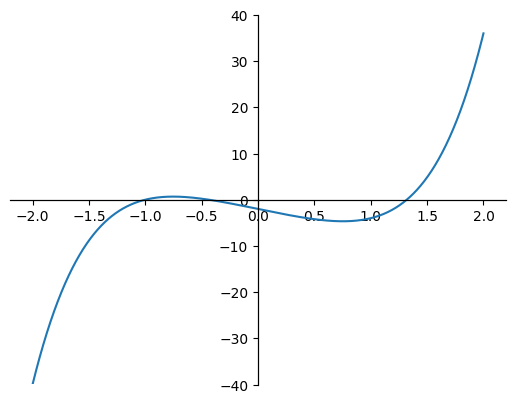

In [ ]:
x = np.linspace(-2, 2, 1000)
y = x**5+2*x**3-5*x-2
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_position('center')
ax.set_ylim([-40, 40])
plt.plot(x,y);

In [ ]:
newton(lambda x: x**5 + 2*x**3 - 5*x-2, lambda x: 5*x**4 + 6*x**2 - 5, 0, 1e-4, 20)

p is -0.43641313299799755 and the iteration number is 4


2.4 Secant method

In [ ]:
def secant(f, pzero, pone, eps, N):
  n = 1
  p = 0
  while n <= N:
    p = pone - f(pone)*(pone-pzero)/(f(pone)-f(pzero))
    if np.isclose(f(p), 0) or np.abs(p-pone) < eps:
      print('p is', p, 'and the interation number is', n)
      return
    pzero = pone
    pone = p
    n += 1
  y = f(P)
  print('Method did not converge, The last interation gives', p, 'with function value', y)

In [ ]:
 secant(lambda x: np.cos(x)-x, 0.5, 1, 1e-4, 20)

p is 0.739085132900112 and the interation number is 4


2.5 Muller's method

In [ ]:
import numpy as np
def muller(f, pzero, pone, ptwo, eps, N):
    n = 1
    p = 0
    while n <= N:
        c = f(ptwo)
        b1 = (pzero - ptwo) * (f(pone) - f(ptwo)) / ((pone - ptwo) * (pzero - pone))
        b2 = (pone - ptwo) * (f(pzero) - f(ptwo)) / ((pzero - ptwo) * (pzero - pone))
        b = b1 - b2

        a1 = (f(pzero) - f(ptwo)) / ((pzero - ptwo) * (pzero - pone))
        a2 = (f(pone) - f(ptwo)) / ((pone - ptwo) * (pzero - pone))
        a = a1 - a2
        d = (complex(b**2 - 4*a*c))**0.5

        if np.abs(b - d) < np.abs(b + d):
            inc = 2*c / (b + d)
        else:
            inc = 2*c / (b - d)
        p = ptwo - inc
        if np.isclose(f(p), 0) or np.abs(p - ptwo) < eps:
            print('p is', p, 'and the iteration number is', n)
            return p
        pzero = pone
        pone = ptwo
        ptwo = p

        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives', p, 'with function value', y)


In [ ]:
 muller(lambda x: x**5+2*x**3-5*x-2, 0.5, 1.0, 1.5, 1e-5, 10)

p is (1.3196411677283386+0j) and the iteration number is 4


(1.3196411677283386+0j)

In [ ]:
muller(lambda x: x**5+2*x**3-5*x-2, 5, 10, 15, 1e-5, 20)

p is (0.05838598289491982-1.8626227582154478j) and the iteration number is 18


(0.05838598289491982-1.8626227582154478j)

2.6 Fixed-point iteration

In [ ]:
import numpy as np

def fixedpt(g, pzero, eps, N):
    n = 1
    while n < N:
        pone = g(pzero)
        if np.abs(pone - pzero) < eps:
            print('p =', pone, 'pada iterasi ke-', n)
            return pone
        pzero = pone
        n += 1
    print('Did not coverge. The last estimate is  p =', pzero)
    return pzero

In [ ]:
fixedpt(lambda x: (2*x**2+1)**(1/3), 1, 1e-4, 30)

p = 2.205472095330031 pada iterasi ke- 19


2.205472095330031

In [ ]:
 2.205472095330031-2.20556943

-9.733466996930673e-05